# Train YOLOv8 Detection Models
**Author:** G8  
**Task:** 3.1 - Train YOLOv8 for Multi-Object Detection  
**Timeline:** Feb 8-9, 2025  

**Models to train:**
1. YOLOv8n (nano - fastest)
2. YOLOv8s (small - balanced)
3. YOLOv8m (medium - best accuracy)

## Setup and Imports

In [1]:
import os
import json
from pathlib import Path
import pandas as pd
import shutil
from ultralytics import YOLO

print("Libraries imported!")
print("Ultralytics YOLO ready")

Libraries imported!
Ultralytics YOLO ready


## Configuration

In [3]:
# Paths
PROJECT_ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
DATA_YAML = PROJECT_ROOT / "data" / "data.yaml"
MODELS_PATH = PROJECT_ROOT / "models" / "detection"
LOGS_PATH = PROJECT_ROOT / "logs" / "detection"

MODELS_PATH.mkdir(parents=True, exist_ok=True)
LOGS_PATH.mkdir(parents=True, exist_ok=True)

# Training parameters
EPOCHS = 80
IMG_SIZE = 672#224#640
BATCH_SIZE = 8
DEVICE = 'mps'  # Use MPS for Apple Silicon M1/M2/M3
WARMUP_EPOCHS = 3 # Number of warmup epochs, best for MPS cuz short gradients, helps stabilize training

print(f"Configuration:")
print(f"  Data config: {DATA_YAML}")
print(f"  Epochs: {EPOCHS}")
print(f"  Image size: {IMG_SIZE}")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Device: {DEVICE} (Apple Silicon GPU)")

Configuration:
  Data config: /Users/kevin/Documents/GitHub/Python/VESKL/11.DAE/NEU/NEU_IE7615/Prj/Discriminative/G8/Project1/IE7615_Discriminative_Project/data/data.yaml
  Epochs: 80
  Image size: 672
  Batch size: 8
  Device: mps (Apple Silicon GPU)


## Verify Dataset

In [4]:
print("="*80)
print("VERIFYING DATASET")
print("="*80)

# Check data.yaml exists
if not DATA_YAML.exists():
    print(f"ERROR: {DATA_YAML} not found!")
    print("Run Task 1.2 (multi-object generation) first")
else:
    print(f"data.yaml found")

    # Read and display
    with open(DATA_YAML, 'r') as f:
        yaml_content = f.read()
    
    print("\nDataset configuration:")
    print(yaml_content[:500])  # Show first 500 chars
    
    # Count images
    multi_obj_path = PROJECT_ROOT / "data" / "multi_objects"
    train_imgs = len(list((multi_obj_path / "images" / "train").glob("*.jpg")))
    val_imgs = len(list((multi_obj_path / "images" / "val").glob("*.jpg")))
    test_imgs = len(list((multi_obj_path / "images" / "test").glob("*.jpg")))
    
    print(f"\nDataset size:")
    print(f"  Train: {train_imgs} images")
    print(f"  Val: {val_imgs} images")
    print(f"  Test: {test_imgs} images")
    print(f"  Total: {train_imgs + val_imgs + test_imgs} images")
    
    if train_imgs < 100:
        print("\nWARNING: Too few training images. Run Task 1.2 first.")

VERIFYING DATASET
data.yaml found

Dataset configuration:
# YOLOv8 Dataset Configuration
# Generated for CNN Attendance System Project

path: /Users/kevin/Documents/GitHub/Python/VESKL/11.DAE/NEU/NEU_IE7615/Prj/Discriminative/G8/Project1/IE7615_Discriminative_Project/data/multi_objects
train: images/train
val: images/val
test: images/test

# Number of classes
nc: 39

# Class names
names:
  0: OBJ001
  1: OBJ002
  2: OBJ003
  3: OBJ004
  4: OBJ005
  5: OBJ006
  6: OBJ007
  7: OBJ008
  8: OBJ009
  9: OBJ010
  10: OBJ012
  11: OBJ016
  12: OBJ018
  13: OB

Dataset size:
  Train: 919 images
  Val: 231 images
  Test: 233 images
  Total: 1383 images


## Train Model 1: YOLOv8n (Nano - Fastest)

In [ ]:
print("="*80)
print("TRAINING YOLOV8N (NANO)")
print("="*80)

# Load pretrained YOLOv8n
print("\nLoading YOLOv8n pretrained model...")
# Load pretrained model from centralized location
PRETRAINED_PATH = PROJECT_ROOT / 'models' / 'pretrained'
PRETRAINED_PATH.mkdir(parents=True, exist_ok=True)
model_n = YOLO(str(PRETRAINED_PATH / 'yolov8n.pt'))

# Train
print("\nStarting training...")
results_n = model_n.train(
    data=str(DATA_YAML),
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    patience=8,
    max_det=10,               
    iou=0.6,                  
    mosaic=0.2,
    close_mosaic=10,
    scale=0.1,
    translate=0.05,
    erasing=0.1,
    fliplr=0.0,
    auto_augment=None,
    save=True,
    save_period=10,
    project=str(LOGS_PATH),
    name='train_n',
    exist_ok=True,
    pretrained=True,
    optimizer='AdamW',
    lr0=1e-3,
    verbose=True,
    seed=42,
    plots=True,
    warmup_epochs=WARMUP_EPOCHS
)

# Copy best weights
best_n = LOGS_PATH / 'train_n' / 'weights' / 'best.pt'
shutil.copy2(best_n, MODELS_PATH / 'yolov8n_best.pt')

print("\n" + "="*80)
print("YOLOV8N TRAINING COMPLETED")
print("="*80)
print(f"Best model saved: {MODELS_PATH / 'yolov8n_best.pt'}")
print(f"Training results: {LOGS_PATH / 'train_n'}")

TRAINING YOLOV8N (NANO)

Loading YOLOv8n pretrained model...

Starting training...
Ultralytics 8.4.11 🚀 Python-3.11.14 torch-2.10.0 MPS (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=None, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/kevin/Documents/GitHub/Python/VESKL/11.DAE/NEU/NEU_IE7615/Prj/Discriminative/G8/Project1/IE7615_Discriminative_Project/data/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=80, erasing=0.1, exist_ok=True, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=672, int8=False, iou=0.6, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=15, mixup=0.0, mode=train, model=/Users/kevi

: 

## Train Model 2: YOLOv8s (Small - Balanced)

In [5]:
print("="*80)
print("TRAINING YOLOV8S (SMALL)")
print("="*80)

print("\nLoading YOLOv8s pretrained model...")
model_s = YOLO("yolov8s.pt")

print("\nStarting training...")
results_s = model_s.train(
    data=str(DATA_YAML),
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    patience=8,                 # lower than 50 → earlier, cleaner convergence
    pretrained=True,
    optimizer="AdamW",            # better generalization than Adam
    lr0=5e-4,                     # safer LR for v8s
    seed=42,
    max_det=15,                  # v8s can handle more boxes than v8n
    iou=0.6,
    mosaic=0.2,
    close_mosaic=10,
    scale=0.1,
    translate=0.05,
    fliplr=0.0,
    auto_augment=None,
    erasing=0.1,
    save=True,
    save_period=8,
    project=str(LOGS_PATH),
    name="train_s",
    exist_ok=True,
    verbose=True,
    plots=True
)

# Copy best weights
best_s = LOGS_PATH / "train_s" / "weights" / "best.pt"
shutil.copy2(best_s, MODELS_PATH / "yolov8s_best.pt")

print("\n" + "="*80)
print("YOLOV8S TRAINING COMPLETED")
print("="*80)
print(f"Best model saved: {MODELS_PATH / 'yolov8s_best.pt'}")

TRAINING YOLOV8S (SMALL)

Loading YOLOv8s pretrained model...

Starting training...
New https://pypi.org/project/ultralytics/8.4.12 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.11 🚀 Python-3.11.14 torch-2.10.0 MPS (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=None, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/kevin/Documents/GitHub/Python/VESKL/11.DAE/NEU/NEU_IE7615/Prj/Discriminative/G8/Project1/IE7615_Discriminative_Project/data/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=80, erasing=0.1, exist_ok=True, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=672, int8=False, iou=0.6, keras=False, kobj=1.0, li

## Train Model 3: YOLOv8m (Medium - Best Accuracy)

In [5]:
print("="*80)
print("TRAINING YOLOV8M (MEDIUM)")
print("="*80)

print("\nLoading YOLOv8m pretrained model...")
model_m = YOLO('yolov8m.pt')

print("\nStarting training...")
results_m = model_m.train(
    data=str(DATA_YAML),
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    patience=5,
    save=True,
    save_period=5,
    project=str(LOGS_PATH),
    name='train_m',
    exist_ok=True,
    pretrained=True,
    optimizer='AdamW',
    lr0=5e-4,
    max_det=10,                  # v8s can handle more boxes than v8n
    iou=0.6,
    mosaic=0.2,
    close_mosaic=10,
    scale=0.1,
    translate=0.05,
    fliplr=0.0,
    auto_augment=None,
    erasing=0.1,
    verbose=True,
    seed=42,
    plots=True,
    warmup_epochs=WARMUP_EPOCHS
)

# Copy best weights
best_m = LOGS_PATH / 'train_m' / 'weights' / 'best.pt'
shutil.copy2(best_m, MODELS_PATH / 'yolov8m_best.pt')

print("\n" + "="*80)
print("YOLOV8M TRAINING COMPLETED")
print("="*80)
print(f"Best model saved: {MODELS_PATH / 'yolov8m_best.pt'}")

TRAINING YOLOV8M (MEDIUM)

Loading YOLOv8m pretrained model...

Starting training...
New https://pypi.org/project/ultralytics/8.4.12 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.11 🚀 Python-3.11.14 torch-2.10.0 MPS (Apple M1)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=None, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/kevin/Documents/GitHub/Python/VESKL/11.DAE/NEU/NEU_IE7615/Prj/Discriminative/G8/Project1/IE7615_Discriminative_Project/data/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=80, erasing=0.1, exist_ok=True, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=672, int8=False, iou=0.6, keras=False, kobj=1.0, l

## Training Summary

In [6]:
print("="*80)
print("YOLOV8 TRAINING SUMMARY")
print("="*80)

# Collect results from training runs
summary_data = []

for variant in ['n', 's', 'm']:
    results_csv = LOGS_PATH / f'train_{variant}' / 'results.csv'
    if results_csv.exists():
        df_results = pd.read_csv(results_csv)
        last_epoch = df_results.iloc[-1]
        
        summary_data.append({
            'model': f'yolov8{variant}',
            'epochs_trained': len(df_results),
            'final_mAP50': float(last_epoch['metrics/mAP50(B)']),
            'final_mAP50_95': float(last_epoch['metrics/mAP50-95(B)']),
            'final_precision': float(last_epoch['metrics/precision(B)']),
            'final_recall': float(last_epoch['metrics/recall(B)'])
        })

df_summary = pd.DataFrame(summary_data)
df_summary = df_summary.sort_values('final_mAP50', ascending=False)

print("\n" + df_summary.to_string(index=False))

# Save summary
summary_path = LOGS_PATH / 'training_summary.csv'
df_summary.to_csv(summary_path, index=False)
print(f"\nSummary saved: {summary_path}")

# Best model
best = df_summary.iloc[0]
print("\n" + "="*80)
print("BEST MODEL")
print("="*80)
print(f"Model: {best['model']}")
print(f"mAP50: {best['final_mAP50']:.4f}")
print(f"mAP50-95: {best['final_mAP50_95']:.4f}")

if best['final_mAP50'] >= 0.85:
    print("\nSUCCESS: Target mAP50 (>0.85) achieved!")
else:
    print(f"\nCurrent mAP50: {best['final_mAP50']:.3f}, target: 0.85")

YOLOV8 TRAINING SUMMARY

  model  epochs_trained  final_mAP50  final_mAP50_95  final_precision  final_recall
yolov8m              17      0.99209         0.99209          0.98900       0.98568
yolov8n              38      0.99127         0.99127          0.98654       0.98437
yolov8s              46      0.99046         0.99046          0.98857       0.98495

Summary saved: /Users/kevin/Documents/GitHub/Python/VESKL/11.DAE/NEU/NEU_IE7615/Prj/Discriminative/G8/Project1/IE7615_Discriminative_Project/logs/detection/training_summary.csv

BEST MODEL
Model: yolov8m
mAP50: 0.9921
mAP50-95: 0.9921

SUCCESS: Target mAP50 (>0.85) achieved!


## View Training Results

TRAINING RESULTS VISUALIZATION

Displaying results for yolov8m:


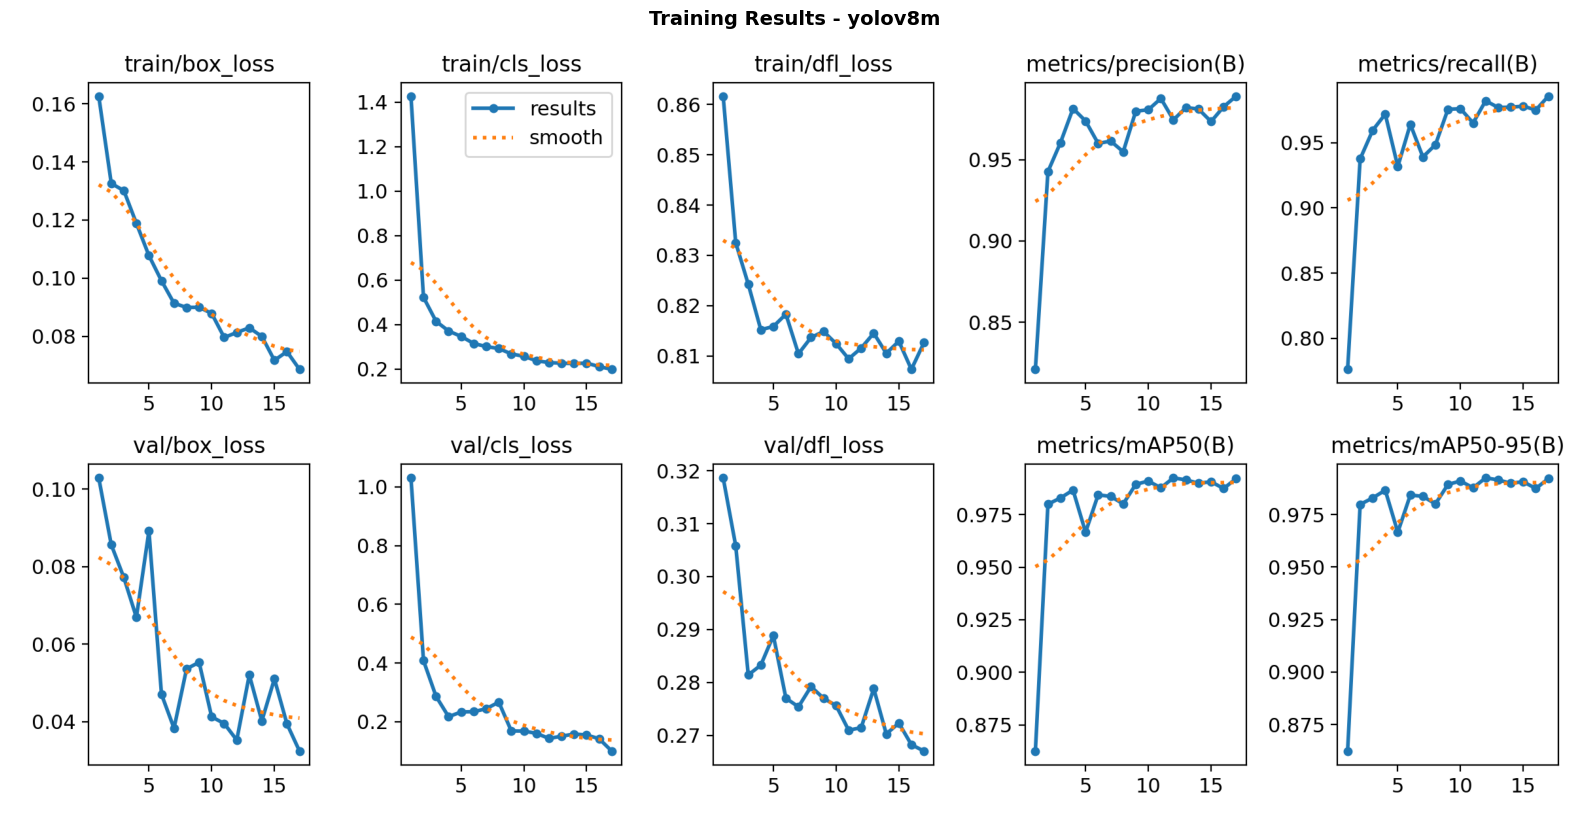

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("="*80)
print("TRAINING RESULTS VISUALIZATION")
print("="*80)

# Display training curves for best model
best_variant = best['model'][-1]  # Get 'n', 's', or 'm'
results_img = LOGS_PATH / f'train_{best_variant}' / 'results.png'

if results_img.exists():
    print(f"\nDisplaying results for {best['model']}:")
    img = mpimg.imread(results_img)
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Training Results - {best['model']}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Results image not found")

## Task 3.1 Complete!

**Deliverables:**
- 3 trained YOLOv8 models (.pt files)
- Training logs and plots
- Results CSV files

**Next:** Task 3.2 - YOLOv8 evaluation